In [99]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [100]:
data16=pd.read_excel("AQI 2016 (1).xls")

In [101]:
data17=pd.read_excel("AQI 2017.xlsx")

In [102]:
data18=pd.read_excel("2018_AQI.xlsx")

In [103]:
data19=pd.read_excel("C2019_AQI.xlsx")

In [104]:
data20=pd.read_excel("2020_AQI.xlsx")

In [105]:
data21=pd.read_excel("2021_AQI.xlsx")

In [106]:
data22=pd.read_excel("2022_AQI.xlsx")

In [107]:
data22

,Location,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Nizamabad,56,59.000000,64.000000,58.000000,56.222222,54,46.000000,53,54,63,56,59
1,Adilabad,54,55.000000,56.000000,65.000000,60.148148,58,48.000000,56,56,65,58,62
2,"Kuda, warangal",58,64.000000,49.105826,66.173930,53.704530,72,40.428571,43,41,64,49,116
3,"Mee-Seva, Warangal",73,72.514053,76.057747,60.080031,77.094650,85,47.268637,56,48,64,94,94
4,Karimnagar,82,90.333333,95.666667,69.926215,76.241282,89,69.197791,55,58,63,101,126
5,Khammam,80,78.079300,76.518519,79.365731,76.611111,81,72.500000,58,42,57,78,115


# Dataset of Khammam

In [108]:
Khammam_data=list(data16.T[5][1:-6])+list(data17.T[5][1:-1])+list(data18.T[5][1:])+list(data19.T[5][1:])+list(data20.T[5][1:])+list(data21.T[5][1:])+list(data22.T[5][1:])

dt=Khammam_data

dt

[46.666666666666664,
 51.333333333333336,
 53.888888888888886,
 50.81481481481481,
 47.44444444444444,
 46.857142857142854,
 40.75925925925927,
 36.958333333333336,
 38.57142857142857,
 47.666666666666664,
 54.77777777777778,
 60,
 60.44444444444444,
 64.44444444444444,
 54.40740740740742,
 54.55555555555556,
 56.96296296296296,
 42.31481481481481,
 40.666666666666664,
 53.18333333333334,
 49.981481481481474,
 63.333333333333336,
 54.29629629629629,
 59.6888888888889,
 64.0,
 67.8888888888889,
 71.4701260026121,
 77.0999014897959,
 77.0322021682794,
 82.819688027905,
 74.856945406139,
 78.8571428571429,
 84.1481481481482,
 84.6976530501641,
 91.7777777777778,
 88,
 94.3703703703704,
 90.4444444444444,
 90.6666666666667,
 89.8924897119342,
 88.2222222222222,
 81.3888888888889,
 77.2915668437642,
 84.0833333333333,
 77.9259259259259,
 85.9444444444444,
 84.8518518518519,
 84.2222222222222,
 88.2962962962963,
 84.0,
 83.0,
 80.0,
 63,
 47.8888888888889,
 70,
 37.1428571428571,
 52,
 62,
 

In [109]:
L=['1-1-2016','1-2-2016','1-3-2016','1-4-2016','1-5-2016','1-6-2016','1-7-2016','1-8-2016','1-9-2016','1-10-2016','1-11-2016','1-12-2016','1-1-2017','1-2-2017','1-3-2017','1-4-2017','1-5-2017','1-6-2017','1-7-2017','1-8-2017','1-9-2017','1-10-2017','1-11-2017','1-12-2017']
L=L+['1-1-2018','1-2-2018','1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018','1-9-2018','1-10-2018','1-11-2018','1-12-2018']
L=L+['1-1-2019','1-2-2019','1-3-2019','1-4-2019','1-5-2019','1-6-2019','1-7-2019','1-8-2019','1-9-2019','1-10-2019','1-11-2019','1-12-2019']
L=L+['1-1-2020','1-2-2020','1-3-2020','1-4-2020','1-5-2020','1-6-2020','1-7-2020','1-8-2020','1-9-2020','1-10-2020','1-11-2020','1-12-2020']
L=L+['1-1-2021','1-2-2021','1-3-2021','1-4-2021','1-5-2021','1-6-2021','1-7-2021','1-8-2021','1-9-2021','1-10-2021','1-11-2021','1-12-2021']
L=L+['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
L

['1-1-2016',
 '1-2-2016',
 '1-3-2016',
 '1-4-2016',
 '1-5-2016',
 '1-6-2016',
 '1-7-2016',
 '1-8-2016',
 '1-9-2016',
 '1-10-2016',
 '1-11-2016',
 '1-12-2016',
 '1-1-2017',
 '1-2-2017',
 '1-3-2017',
 '1-4-2017',
 '1-5-2017',
 '1-6-2017',
 '1-7-2017',
 '1-8-2017',
 '1-9-2017',
 '1-10-2017',
 '1-11-2017',
 '1-12-2017',
 '1-1-2018',
 '1-2-2018',
 '1-3-2018',
 '1-4-2018',
 '1-5-2018',
 '1-6-2018',
 '1-7-2018',
 '1-8-2018',
 '1-9-2018',
 '1-10-2018',
 '1-11-2018',
 '1-12-2018',
 '1-1-2019',
 '1-2-2019',
 '1-3-2019',
 '1-4-2019',
 '1-5-2019',
 '1-6-2019',
 '1-7-2019',
 '1-8-2019',
 '1-9-2019',
 '1-10-2019',
 '1-11-2019',
 '1-12-2019',
 '1-1-2020',
 '1-2-2020',
 '1-3-2020',
 '1-4-2020',
 '1-5-2020',
 '1-6-2020',
 '1-7-2020',
 '1-8-2020',
 '1-9-2020',
 '1-10-2020',
 '1-11-2020',
 '1-12-2020',
 '1-1-2021',
 '1-2-2021',
 '1-3-2021',
 '1-4-2021',
 '1-5-2021',
 '1-6-2021',
 '1-7-2021',
 '1-8-2021',
 '1-9-2021',
 '1-10-2021',
 '1-11-2021',
 '1-12-2021',
 '1-1-2022',
 '1-2-2022',
 '1-3-2022',
 '1-4-2

In [110]:
df=pd.DataFrame()
df.reset_index()
df["Date"]=L
df["AQI"]=dt
df

,Date,AQI
0,1-1-2016,46.666667
1,1-2-2016,51.333333
2,1-3-2016,53.888889
3,1-4-2016,50.814815
4,1-5-2016,47.444444
...,...,...
79,1-8-2022,58.000000
80,1-9-2022,42.000000
81,1-10-2022,57.000000
82,1-11-2022,78.000000


In [111]:
df1=df[["Date","AQI"]]
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%d-%Y').dt.strftime('%d-%Y')

df["Date"]=pd.to_datetime(df["Date"])
print(df1)
x=df["Date"]
y=df["AQI"]
#plt.plot(x,y)
df=df.set_index("Date")

       Date         AQI
0   01-2016   46.666667
1   02-2016   51.333333
2   03-2016   53.888889
3   04-2016   50.814815
4   05-2016   47.444444
..      ...         ...
79  08-2022   58.000000
80  09-2022   42.000000
81  10-2022   57.000000
82  11-2022   78.000000
83  12-2022  115.000000

[84 rows x 2 columns]


In [112]:
df1

,Date,AQI
0,01-2016,46.666667
1,02-2016,51.333333
2,03-2016,53.888889
3,04-2016,50.814815
4,05-2016,47.444444
...,...,...
79,08-2022,58.000000
80,09-2022,42.000000
81,10-2022,57.000000
82,11-2022,78.000000


In [113]:
df1["Date"]

0     01-2016
1     02-2016
2     03-2016
3     04-2016
4     05-2016
       ...   
79    08-2022
80    09-2022
81    10-2022
82    11-2022
83    12-2022
Name: Date, Length: 84, dtype: object

# AQI levels of Khammam between 2016 and 2022

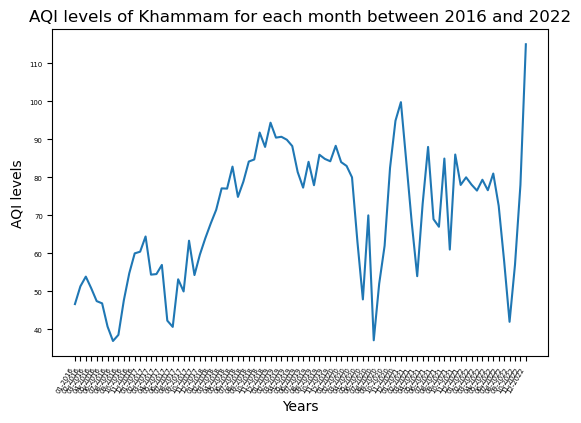

In [114]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],df1["AQI"], marker='', linestyle='-')

fig.autofmt_xdate()


plt.title("AQI levels of Khammam for each month between 2016 and 2022")
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(5)
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [116]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(df)
print("The p-value of the dataset is",dfa[1])

The p-value of the dataset is 0.06479455818269045


In [117]:
#plt.plot(df)

In [118]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(df["AQI"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=638.206, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=641.005, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=642.339, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=642.380, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=639.450, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=646.052, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=638.684, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=637.130, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=635.592, Time=0.42 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -310.463
Date:                Sat, 04 Mar 2023   AIC                            634.926
Time:                        18:42:35   BIC                            651.858
Sample:                             0   HQIC                           641.729
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4029      0.144      2.793      0.005       0.120       0.686
ar.L2         -0.6017      0.156     -3.859      0.000      -0.907      -0.296
ma.L1         -0.6053      0.222     -2.731      0.006      -1.040      -0.171
ma.L2          0.7208      0.263      2.739      0.006       0.205       1.236
ma.L3         -0.3731      0.221     -1.684      0.092      -0.807       0.061
ma.L4         -0.2989      0.185     -1.618      0.106      -0.661       0.063
sigma2        99.7715     13.068      7.635      0.000      74.159     125.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.67
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
'''df.sort_index(inplace=True)
df'''

'df.sort_index(inplace=True)\ndf'

In [120]:
train=df.iloc[:-12]
test=df.iloc[-12:]

# ARIMA model

In [121]:
from statsmodels.tsa.arima.model import ARIMA 
print(train)
model =ARIMA(train,order=(2,1,4),seasonal_order=(9,1,1,12))
model_fit =model.fit()
model_fit.summary()

                  AQI
Date                 
2016-01-01  46.666667
2016-01-02  51.333333
2016-01-03  53.888889
2016-01-04  50.814815
2016-01-05  47.444444
...               ...
2021-01-08  67.000000
2021-01-09  84.938737
2021-01-10  61.000000
2021-01-11  86.000000
2021-01-12  78.000000

[72 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   72
Model:             ARIMA(2, 1, 4)x(9, 1, [1], 12)   Log Likelihood                -224.424
Date:                            Sat, 04 Mar 2023   AIC                            482.848
Time:                                    18:44:06   BIC                            518.166
Sample:                                         0   HQIC                           496.635
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2047      1.030      0.199      0.843      -1.815       2.224
ar.L2         -0.7471      0.436     -1.714      0.087      -1.602       0.107
ma.L1         -0.6520      0.969     -0.673      0.501      -2.552       1.248
ma.L2          0.9513      2.451      0.388      0.698      -3.852       5.754
ma.L3         -0.4653      1.279     -0.364      0.716      -2.972       2.041
ma.L4         -0.1238      0.560     -0.221      0.825      -1.221       0.973
ar.S.L12      -0.1439    555.642     -0.000      1.000   -1089.182    1088.895
ar.S.L24      -0.1380    280.076     -0.000      1.000    -549.076     548.800
ar.S.L36      -0.2090    310.403     -0.001      0.999    -608.588     608.170
ar.S.L48      -0.3033    215.137     -0.001      0.999    -421.964     421.358
ar.S.L60      -0.3126    216.661     -0.001      0.999    -424.959     424.334
ar.S.L72       0.7217    225.581      0.003      0.997    -441.409     442.853
ar.S.L84      -0.0335    550.474  -6.09e-05      1.000   -1078.942    1078.875
ar.S.L96      -0.0013    306.420   -4.4e-06      1.000    -600.574     600.571
ar.S.L108   4.631e-05    256.259   1.81e-07      1.000    -502.259     502.259
ma.S.L12      -0.5746    468.930     -0.001      0.999    -919.661     918.512
sigma2         5.4858    937.117      0.006      0.995   -1831.230    1842.202
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.94
Prob(Q):                              0.95   Prob(JB):                         0.23
Heteroskedasticity (H):               5.68   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

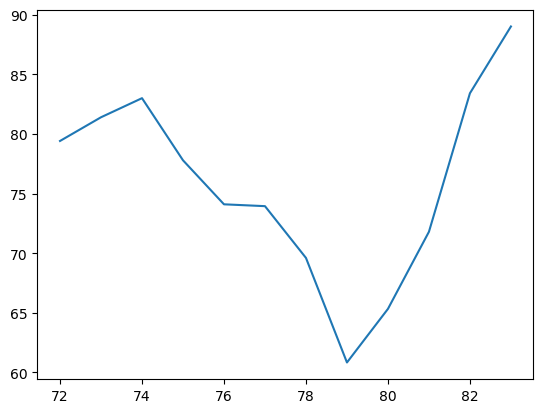

In [122]:
pred_new=model_fit.forecast(12)
plt.plot(pred_new)

In [123]:
#res.index

In [124]:
time_list=['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
res=pd.DataFrame(pred_new)
res["Date"]=time_list
a=list(res['predicted_mean'])
res["AQI"]=a
res=res.drop(["predicted_mean"],axis=1)
res["Date"]=pd.to_datetime(res["Date"])
df2=res[["Date","AQI"]]
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")

In [125]:
final_data =train
pred_data=final_data.append(res)

In [126]:
#df2

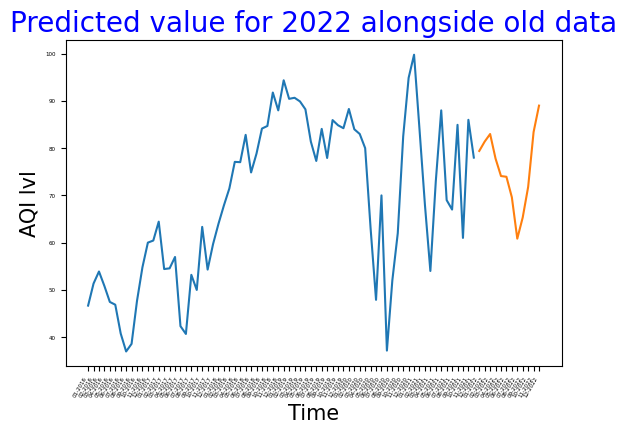

In [133]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"][:-12],df1["AQI"][:-12], marker='', linestyle='-')
ax.plot_date(df2["Date"],df2["AQI"] ,marker='', linestyle='-')
fig.autofmt_xdate()


plt.title("Predicted value for 2022 alongside old data",fontsize = 20,c='b')
plt.xlabel("Time",fontsize = 15)
plt.ylabel("AQI lvl",fontsize = 15)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()



# Performance of the model

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_new,test["AQI"]))
ame=mean_absolute_error(pred_new,test["AQI"])

print("Average Temperature         : ",df['AQI'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  69.68427849207775
Root mean Square value      :  11.534783781854145
Mean absolute Error         :  8.066526805995647


# Forcasting for 2023

In [129]:
model =ARIMA(df,order=(2,1,4),seasonal_order=(9,1,1,12))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   84
Model:             ARIMA(2, 1, 4)x(9, 1, [1], 12)   Log Likelihood                -272.536
Date:                            Sat, 04 Mar 2023   AIC                            579.072
Time:                                    18:45:04   BIC                            617.537
Sample:                                         0   HQIC                           594.368
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3575      0.359      0.995      0.320      -0.347       1.062
ar.L2         -0.6894      0.359     -1.921      0.055      -1.393       0.014
ma.L1         -0.6964      0.381     -1.828      0.068      -1.443       0.050
ma.L2          0.9107      0.595      1.530      0.126      -0.256       2.077
ma.L3         -0.4679      0.364     -1.285      0.199      -1.181       0.246
ma.L4         -0.1744      0.274     -0.636      0.525      -0.712       0.363
ar.S.L12       0.0814   1182.335   6.89e-05      1.000   -2317.253    2317.416
ar.S.L24       0.4259   1298.984      0.000      1.000   -2545.536    2546.387
ar.S.L36       0.0440    718.396   6.13e-05      1.000   -1407.986    1408.074
ar.S.L48       0.0365    426.944   8.55e-05      1.000    -836.759     836.832
ar.S.L60       0.4973    186.454      0.003      0.998    -364.945     365.939
ar.S.L72       0.3665    634.345      0.001      1.000   -1242.926    1243.660
ar.S.L84      -0.7633   1262.959     -0.001      1.000   -2476.117    2474.591
ar.S.L96      -0.0147   1386.773  -1.06e-05      1.000   -2718.040    2718.011
ar.S.L108      0.0480    710.077   6.76e-05      1.000   -1391.677    1391.773
ma.S.L12      -0.7108   1350.469     -0.001      1.000   -2647.582    2646.160
sigma2        23.6611    2.1e+04      0.001      0.999   -4.11e+04    4.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 6.14
Prob(Q):                              0.81   Prob(JB):                         0.05
Heteroskedasticity (H):               3.93   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
pred_new =model_fit.forecast(12)
print("The predicted AQI values of each month of 2023 is:\n",pd.DataFrame(pred_new))

The predicted AQI values of each month of 2023 is:
     predicted_mean
84      110.375344
85       99.712960
86       84.062571
87       80.032974
88       92.074882
89       99.995372
90       90.269429
91       89.883716
92       96.075079
93       86.674518
94      103.449627
95      105.709429


In [131]:
res=pd.DataFrame(pred_new)
res.columns=["AQI"]
time_list=['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
res["AQI"]=pred_new
res["Date"]=time_list
res["Date"]=pd.to_datetime(res["Date"])
res['Date'] = pd.to_datetime(res['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")
res

,AQI
Date,
01-2023,110.375344
02-2023,99.712960
03-2023,84.062571
04-2023,80.032974
05-2023,92.074882
06-2023,99.995372
07-2023,90.269429
08-2023,89.883716
09-2023,96.075079


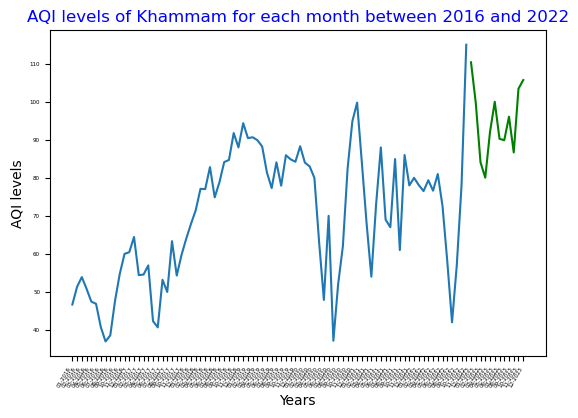

In [132]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')
plt.plot(res,c='g')

fig.autofmt_xdate()


plt.title("AQI levels of Khammam for each month between 2016 and 2022",c='b')
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()
